In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import scipy.stats
import math

In [2]:
soma = sum(range(1, 101))
soma

5050

In [3]:
resultado = math.sqrt(soma)
resultado

71.06335201775947

In [4]:
print('O resultado final é ' + str(round(resultado, 1)) + '.')

O resultado final é 71.1.


##### Obs: Não conseguiria fazer no R, mas vou estudar para aprender mais pra frente. 

##### Para a 2ª questão, vou baixar alguns dados do Bacen.

### Obtendo dados do Bacen

In [5]:
def consulta_bc(codigo_bcb):
    url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
    df = pd.read_json(url)
    df['data'] = pd.to_datetime(df['data'], dayfirst=True)
    df.set_index('data', inplace=True)
    return df

In [6]:
selic = 4390
juros_pj = 25434
juros_pf = 25435

In [7]:
dados = consulta_bc(selic)
dados = dados.rename(columns = {'data' : 'Data', 'valor' : 'SELIC'})
dados['Juros de Pessoa Jurídica'] = consulta_bc(juros_pj)
dados['Juros de Pessoa Física'] = consulta_bc(juros_pf)
dados = dados.dropna()
dados

,SELIC,Juros de Pessoa Jurídica,Juros de Pessoa Física
data,,,
2011-03-01,0.92,1.48,2.62
2011-04-01,0.84,1.52,2.66
2011-05-01,0.99,1.52,2.65
2011-06-01,0.96,1.50,2.63
2011-07-01,0.97,1.51,2.65
...,...,...,...
2020-10-01,0.16,0.85,1.80
2020-11-01,0.15,0.86,1.79
2020-12-01,0.16,0.88,1.75


#### Média

In [8]:
print('A média mensal da taxa SELIC, desde 2011, é de ' + str(round(dados['SELIC'].mean() , 2)) + '%.')

print("")

print('A média mensal da taxa de juros de pessoas jurídicas, desde 2011, é de ' + str(round(dados['Juros de Pessoa Jurídica'].mean() , 2)) + '%.')

print("")

print('A média mensal da taxa de juros de pessoas físicas, desde 2011, é de ' + str(round(dados['Juros de Pessoa Física'].mean() , 2)) + '%.')

A média mensal da taxa SELIC, desde 2011, é de 0.72%.

A média mensal da taxa de juros de pessoas jurídicas, desde 2011, é de 1.31%.

A média mensal da taxa de juros de pessoas físicas, desde 2011, é de 2.35%.


#### Mediana

In [9]:
print('A mediana da série de dados mensal da taxa SELIC, desde 2011, é de ' + str(round(dados['SELIC'].median() , 2)) + '%.')

print("")

print('A mediana da série de dados mensal da taxa de juros de pessoas jurídicas, desde 2011, é de ' 
      + str(round(dados['Juros de Pessoa Jurídica'].median() , 2)) + '%.')

print("")

print('A mediana da série de dados mensal da taxa de juros de pessoas físicas, desde 2011, é de ' 
      + str(round(dados['Juros de Pessoa Física'].median() , 2)) + '%.')

A mediana da série de dados mensal da taxa SELIC, desde 2011, é de 0.73%.

A mediana da série de dados mensal da taxa de juros de pessoas jurídicas, desde 2011, é de 1.29%.

A mediana da série de dados mensal da taxa de juros de pessoas físicas, desde 2011, é de 2.27%.


#### Variância

In [10]:
print('A variância da série de dados mensal da taxa SELIC, desde 2011, é de ' + str(round(dados['SELIC'].var() , 2)) + '.')

print("")

print('A variância da série de dados mensal da taxa de juros de pessoas jurídicas, desde 2011, é de ' + 
      str(round(dados['Juros de Pessoa Jurídica'].var() , 2)) + '.')

print("")

print('A variância da série de dados mensal da taxa de juros de pessoas físicas, desde 2011, é de ' + 
      str(round(dados['Juros de Pessoa Física'].var() , 2)) + '.')

A variância da série de dados mensal da taxa SELIC, desde 2011, é de 0.08.

A variância da série de dados mensal da taxa de juros de pessoas jurídicas, desde 2011, é de 0.05.

A variância da série de dados mensal da taxa de juros de pessoas físicas, desde 2011, é de 0.1.


#### Desvio padrão

In [11]:
print('O desvio padrão da série de dados mensal da taxa SELIC, desde 2011, é de ' + str(round(dados['SELIC'].std() , 2)) + '.')

print("")

print('O desvio padrão da série de dados mensal da taxa de juros de pessoas jurídicas, desde 2011, é de ' 
      + str(round(dados['Juros de Pessoa Jurídica'].std() , 2)) + '.')

print("")

print('O desvio padrão da série de dados mensal da taxa de juros de pessoas físicas, desde 2011, é de ' 
      + str(round(dados['Juros de Pessoa Física'].std() , 2)) + '.')


O desvio padrão da série de dados mensal da taxa SELIC, desde 2011, é de 0.28.

O desvio padrão da série de dados mensal da taxa de juros de pessoas jurídicas, desde 2011, é de 0.21.

O desvio padrão da série de dados mensal da taxa de juros de pessoas físicas, desde 2011, é de 0.31.


#### Correlação da SELIC e juros de pessoa física

In [12]:
X = dados['SELIC']
Y = dados['Juros de Pessoa Física']

In [13]:
print('A correlação é de ' + str(round(scipy.stats.pearsonr(X, Y)[0], 2)) + '.')

A correlação é de 0.83.


#### Análise de Regressão da taxa SELIC e dos juros de pessoa física

In [14]:
X1 = sm.add_constant(X.values)

reg = sm.OLS(Y, X1).fit()

In [15]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Juros de Pessoa Física   R-squared:                       0.696
Model:                                OLS   Adj. R-squared:                  0.693
Method:                     Least Squares   F-statistic:                     269.6
Date:                    Mon, 05 Apr 2021   Prob (F-statistic):           2.93e-32
Time:                            17:42:26   Log-Likelihood:                 42.518
No. Observations:                     120   AIC:                            -81.04
Df Residuals:                         118   BIC:                            -75.46
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6991      0.043     39.750      0.000       1.614       1.784
x1             0.9102      0.055     16.421      0.000       0.800       1.020
==============================================================================
Omnibus:                        5.394   Durbin-Watson:                   0.265
Prob(Omnibus):                  0.067   Jarque-Bera (JB):                3.627
Skew:                          -0.267   Prob(JB):                        0.163
Kurtosis:                       2.336   Cond. No.                         5.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

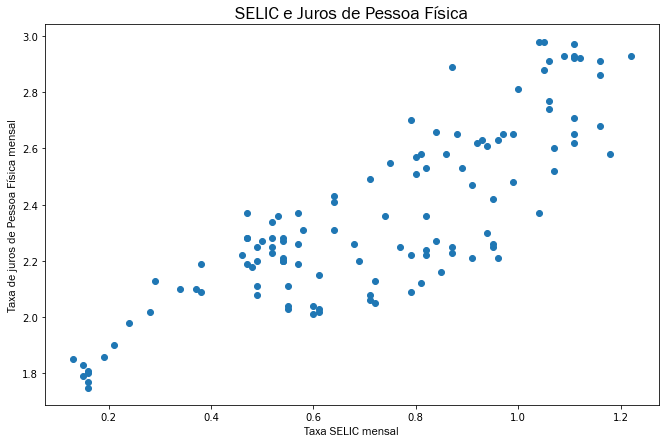

In [16]:
plt.figure(figsize =(11, 7))
plt.scatter(dados['SELIC'], dados['Juros de Pessoa Física'])
plt.xlabel('Taxa SELIC mensal', fontsize = 12, fontname = 'Franklin Gothic Book')
plt.ylabel('Taxa de juros de Pessoa Física mensal', fontsize = 12, fontname = 'Franklin Gothic Book')
plt.title('SELIC e Juros de Pessoa Física', fontsize = 18, fontname = 'Franklin Gothic Book')
plt.show()
